In [17]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# load the data
pd.options.display.precision = 15 # round up to 15 decimal digits 
df = pd.read_csv("data.csv")      # reading the csv file named "data.csv"
df.head(20)                       # taking out the first 20 (index 0 - index 19) datas from the file.

,x-values,y-values
0,-3.14159265358979,0.000000000000000
1,-2.81089869005402,-0.437022305259870
2,-2.48020472651826,-0.781709877071470
3,-2.14951076298249,-0.852076056027190
4,-1.81881679944672,-0.523359354479080
5,-1.48812283591095,0.221211026816860
6,-1.15742887237519,1.271307340317750
7,-0.82673490883942,2.410892493715280
8,-0.49604094530365,3.375392641226650
9,-0.16534698176788,3.927491941286241


In [19]:
# set x column to x 
# set y column to y
np.set_printoptions(precision = 15) # set floating point position to be 15. only display 15 decimals 
y = df.iloc[:,1].values
x = df.iloc[:,:1].values # index up to column 1 
x,y



(array([[-3.14159265358979],
        [-2.81089869005402],
        [-2.48020472651826],
        [-2.14951076298249],
        [-1.81881679944672],
        [-1.48812283591095],
        [-1.15742887237519],
        [-0.82673490883942],
        [-0.49604094530365],
        [-0.16534698176788],
        [ 0.16534698176788],
        [ 0.49604094530365],
        [ 0.82673490883942],
        [ 1.15742887237519],
        [ 1.48812283591095],
        [ 1.81881679944672],
        [ 2.14951076298249],
        [ 2.48020472651826],
        [ 2.81089869005402],
        [ 3.14159265358979]]),
 array([ 0.               , -0.43702230525987 , -0.78170987707147 ,
        -0.85207605602719 , -0.52335935447908 ,  0.22121102681686 ,
         1.27130734031775 ,  2.41089249371528 ,  3.37539264122665 ,
         3.927491941286241,  3.927491941286241,  3.37539264122665 ,
         2.41089249371528 ,  1.27130734031775 ,  0.22121102681686 ,
        -0.52335935447908 , -0.85207605602719 , -0.78170987707147 ,
        -0

In [20]:
#Linear regression 
from sklearn.linear_model import LinearRegression
model  = LinearRegression().fit(x,y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# check whether the model works satisfactorily and interpret it.
r_sq = model.score(x,y)
print("coefficient of determination: ", r_sq)

coefficient of determination:  0.0


In [22]:
model.coef_

array([6.631446895811862e-18])

In [23]:
model.intercept_

0.861212785052517

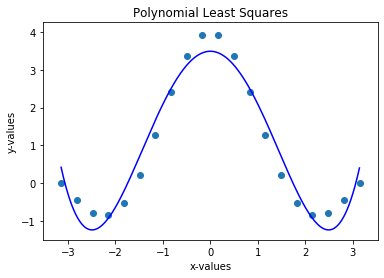

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 

#degree = 4
#poly = make_pipeline(PolynomialFeatures(degree), LinearRegression()) 
#poly.fit(x, y)

xx = x.flatten()
coefs = np.polyfit(xx, y, 4)
xx = np.arange(xx.min(), xx.max(), 0.01)
plt.figure()
plt.plot(xx, np.polyval(coefs, xx), color = 'blue')
plt.title("Polynomial Least Squares")
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.scatter(x, y)
plt.show()

In [25]:
rounded = np.around(coefs, 4)
rounded

array([ 0.1233,  0.    , -1.5285,  0.    ,  3.495 ])

In [36]:
#part2.
# calculating the coefficients for the trigometric polynomial

# flatten the data to be actually flat.not like 2D or 3D. but 1D
xx = x.flatten()
yy = y.flatten()

Array = np.array([np.ones(len(xx)),np.cos(xx),np.cos(2 * xx),np.cos(3 * xx),np.sin(xx),np.sin(2 * xx)])

pinv = np.linalg.pinv(Array) 
a = np.dot(pinv.T,y)
getRoundigUp = np.around(a,4)
print(getRoundigUp)

def s(x):
    return a[0] + a[1]*np.cos(x) +a[2]*np.cos(2 * x)+a[3]*np.cos(3*x)+a[4]*np.sin(x) + a[5]*np.sin(2*x)


[ 0.9153  2.2202  0.975  -0.1641 -0.      0.    ]


[ 0.9153  2.2202  0.975  -0.1641 -0.      0.    ]


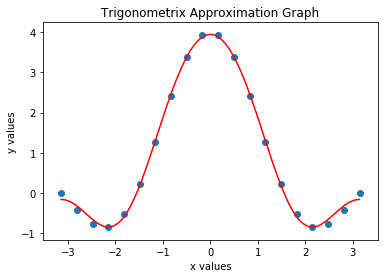

In [38]:
#ploting the figure
xvalues = np.arange(np.min(xx),np.max(xx),0.01)
print(getRoundigUp)

plt.figure()
plt.plot(xvalues,s(xvalues),color = 'red')
plt.title("Trigonometrix Approximation Graph")
plt.xlabel("x values")
plt.ylabel("y values")
plt.scatter(x,y)
plt.show()